# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
import wget

import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from transformers import GPT2Tokenizer, DataCollatorForLanguageModeling
from datasets import Dataset

%matplotlib inline

c:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Kirill\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance(

AttributeError: _ARRAY_API not found

FailedPreconditionError: ./logs is not a directory

# –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [2]:
dataset = wget.download('https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv?download=')

In [3]:
dataset

'geo-reviews-dataset-2023 (1).tskv'

In [4]:
# –°—á–∏—Ç–∞–µ–º –ø—Ä–∏ –ø–æ–º–æ—â–∏ pandas –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª —Å —Ç–∞–±—É–ª—è—Ü–∏–µ–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è, –∑–∞–¥–∞–≤ –Ω—É–∂–Ω—ã–µ –Ω–∞–º –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫
df = pd.read_csv('geo-reviews-dataset-2023.tskv', sep='\t', header=None, names=['address', 'name_ru', 'rating', 'rubrics', 'text'])
columns = df.columns.to_list()
# –ü—Ä–æ–π–¥–µ–º –≤ —Ü–∏–∫–ª–µ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º –∏ —É–¥–∞–ª–∏–º –∏–∑ —è—á–µ–µ–∫ –∫–ª—é—á–∏
for column in columns:
    df[column] = df[column].replace(f'{column}=', '', regex=True)

In [5]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df.head(5)

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

  rating                                            rubrics  \
0     3.                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

In [6]:
# –†–∞–∑–º–µ—Ä –¥–∞—Ç–∞ —Ñ—Ä–µ–π–º–∞
df.shape

(500000, 5)

In [7]:
df.dtypes

address    object
name_ru    object
rating     object
rubrics    object
text       object
dtype: object

In [8]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
df.nunique()

address    191925
name_ru    148461
rating        393
rubrics     32694
text       498918
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  500000 non-null  object
 2   rating   500000 non-null  object
 3   rubrics  500000 non-null  object
 4   text     499030 non-null  object
dtypes: object(5)
memory usage: 19.1+ MB


–í–∏–¥–∏–º, —á—Ç–æ –≤ –Ω–∞—à–µ–π –î–∞—Ç–∞–§—Ä–µ–π–º–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –∫–æ–ª–æ–Ω–∫–µ "text". –£–¥–∞–ª–∏–º –∏—Ö

In [10]:
df = df.dropna(ignore_index=True)

In [11]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(1)

–í—ã–≤–µ–¥–µ–º –Ω–∞ —ç–∫—Ä–∞–Ω

In [12]:
df.loc[df.duplicated(keep=False), :]

address        name_ru rating  \
123882  –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫, –Ø—Å—Ç—ã–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 14  –°–ø–∞—Ä—Ç–∞ –ú–∞—Ä–∫–µ—Ç     5.   
123884  –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫, –Ø—Å—Ç—ã–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 14  –°–ø–∞—Ä—Ç–∞ –ú–∞—Ä–∫–µ—Ç     5.   

                                                  rubrics  \
123882  –ê–≤—Ç–æ–∞–∫—É—Å—Ç–∏–∫–∞;–¢–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–≤—Ç–æ—Å—Ç—ë–∫–æ–ª;–ü–ª—ë–Ω–∫–∏ –∞—Ä—Ö...   
123884  –ê–≤—Ç–æ–∞–∫—É—Å—Ç–∏–∫–∞;–¢–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–≤—Ç–æ—Å—Ç—ë–∫–æ–ª;–ü–ª—ë–Ω–∫–∏ –∞—Ä—Ö...   

                                                     text  
123882  –•–æ—Ä–æ—à–∏–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç—ã, –≤–µ–∂–ª–∏–≤—ã–µ.\n–í—Å–µ –ø–æ–º–æ–≥–ª–∏ ,...  
123884  –•–æ—Ä–æ—à–∏–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç—ã, –≤–µ–∂–ª–∏–≤—ã–µ.\n–í—Å–µ –ø–æ–º–æ–≥–ª–∏ ,...

–í–∏–¥–∏–º, —á—Ç–æ –≤ –∫–æ–ª–æ–Ω–∫–µ 'rating' –ø–æ—Å–ª–µ —Ü–∏—Ñ—Ä—ã –∏–¥—ë—Ç —Ç–æ—á–∫–∞. –£–±–µ—Ä—ë–º –µ—ë. –ü—Ä–∏–≤–µ–¥—ë–º –∫ —Ç–∏–ø—É int64

In [13]:
df['rating'] = df['rating'].replace('\.', '', regex=True)
df['rating'] = pd.to_numeric(df['rating'])

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –∫–æ–ª–æ–Ω–∫–µ 'rating', –ø–æ—Å—Ç—Ä–æ–∏–≤ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É

<Axes: xlabel='rating', ylabel='Count'>

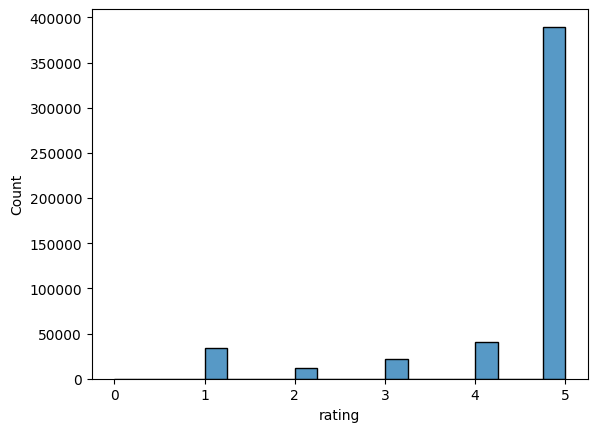

In [14]:
sns.histplot(df['rating'])

–ò–∑ —ç—Ç–æ–≥–æ –≤–∏–¥–Ω–æ, —á—Ç–æ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5 —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö. –ü—Ä–∏—á—ë–º —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0 –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç.
–ü–æ—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –æ—Ç–∑—ã–≤—ã —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0

In [15]:
df.query('rating==0')

address            name_ru  \
1906     –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è, –°—É–æ—è—Ä–≤–∏, —É–ª–∏—Ü–∞ –®–µ–ª—å—à–∞–∫–æ–≤–∞, 1  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –ö–∞—Ä–µ–ª–∏—è   
2164                     –ö–µ–º–µ—Ä–æ–≤–æ, —É–ª–∏—Ü–∞ –¢—É—Ö–∞—á–µ–≤—Å–∫–æ–≥–æ, 12           –°–≤–µ—Ç–æ—Ñ–æ—Ä   
3583         –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –ê–Ω–∞–ø–∞, —É–ª–∏—Ü–∞ –ü—É—à–∫–∏–Ω–∞, 30             –ö—É–±–∞–Ω—å   
3614    –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –¢—É–∞–ø—Å–∏–Ω—Å–∫–∏–π —Ä–∞–π–æ–Ω, –ù–æ–≤–æ–º–∏—Ö...   –°—á–∞—Å—Ç–ª–∏–≤—ã–π –•–æ—Ç–µ–π   
6384        –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –í—ã–±–æ—Ä–≥, —É–ª–∏—Ü–∞ –ú–∏—Ä–∞, 8–ê             –ê—Ç—Ä–∏—É–º   
...                                                   ...                ...   
481104  –ø–æ—Å—ë–ª–æ–∫ –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ —Ç–∏–ø–∞ –°–∏—Ä–∏—É—Å, –ù–∞–±–µ—Ä–µ–∂–Ω–∞—è —É–ª–∏...            –ï–º –∏ –µ–º   
482537  –ö–∞–±–∞—Ä–¥–∏–Ω–æ-–ë–∞–ª–∫–∞—Ä—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞, –ù–∞–ª—å—á–∏–∫, —É–ª–∏—Ü...         –ê–º–±–∞—Å—Å–∞–¥–æ—Ä   
485989  –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª–∏—Ü–∞ –¶–≤–∏–ª...               –†–∏–º–∏   
494291               –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ü–æ–ª—Ç–∞–≤—Å–∫–∞—è —É–ª–∏—Ü–∞, 3      –î–æ–±—Ä—ã–π –ì—Ä—É–∑–∏–Ω   
494577  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –û–∫—Ç—è–±—Ä—å—Å–∫–∞—è –Ω–∞–±. / —É–ª. –î—ã–±–µ–Ω–∫...        –¶–∏–≤–∏–ª–∏–∑–∞—Ü–∏—è   

        rating                                            rubrics  \
1906         0                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
2164         0  –ú–∞–≥–∞–∑–∏–Ω –∞–≤—Ç–æ–∑–∞–ø—á–∞—Å—Ç–µ–π –∏ –∞–≤—Ç–æ—Ç–æ–≤–∞—Ä–æ–≤;–ê–≤—Ç–æ–∞–∫—Å–µ—Å—Å...   
3583         0                                          –°–∞–Ω–∞—Ç–æ—Ä–∏–π   
3614         0                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
6384         0                                     –¢–æ—Ä–≥–æ–≤—ã–π —Ü–µ–Ω—Ç—Ä   
...        ...                                                ...   
481104       0     –°—Ç–æ–ª–æ–≤–∞—è;–ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ;–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤   
482537       0                     –†–µ—Å—Ç–æ—Ä–∞–Ω;–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤   
485989       0  –ú–µ–±–µ–ª—å –¥–ª—è –∫—É—Ö–Ω–∏;–ú–µ–±–µ–ª—å –Ω–∞ –∑–∞–∫–∞–∑;–ì–∞—Ä–¥–µ—Ä–æ–±–Ω—ã–µ —Å...   
494291       0       –†–µ—Å—Ç–æ—Ä–∞–Ω;–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤;–ë–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª   
494577       0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   

                                                     text  
1906    –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω–∞ —É–¥–æ–±–Ω–æ, –µ—Å–ª–∏ –æ—Ç—Ä–µ–º–æ–Ω—Ç–∏—Ä...  
2164    –≠—Ç–æ –º–æ–π –ª—é–±–∏–º—ã–π –º–∞–≥–∞–∑–∏–Ω —Å –∑–∞–ø—á–∞—Å—Ç—è–º–∏. –ú–æ–∂–Ω–æ –≤—Å...  
3583    –ù–µ—Ç —Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ–≥–æ –º–∞—Å–ª–∞ –¥–ª—è —Å–∞–ª–∞—Ç–∞, –Ω–µ—Ç –∑—É–±–æ—á–∏...  
3614    –í—Å–µ –¥–æ–≤–æ–ª—å–Ω—ã, –∏ –≤–∑—Ä–æ—Å–ª—ã–µ –∏ –¥–µ—Ç–∏.\n–í–∫—É—Å–Ω–∞—è –µ–¥–∞....  
6384    –ë–æ–ª—å—à–æ–π –≤—ã–±–æ—Ä, –æ—á–µ–Ω—å –≥—Ä–∞–º–æ—Ç–Ω–æ –∏ —É–¥–æ–±–Ω–æ —Ä–∞–∑–ª–æ–∂–µ...  
...                                                   ...  
481104  –û—Ç–ª–∏—á–Ω–∞—è —Å—Ç–æ–ª–æ–≤–∞—è —Ö–æ–¥–∏–º –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ...  
482537  –ù–∞ –¥–Ω—è—Ö –ø–æ—Å–µ—Ç–∏–ª–∏ —Å —Å–µ–º—å—ë–π —Ä–µ—Å—Ç–æ—Ä–∞–Ω –ê–º–±–∞—Å—Å–∞–¥–æ—Ä....  
485989  –ö—É—Ö–Ω–∏ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞. –•–æ—Ä–æ—à–µ–µ –æ–±—Å–ª—É–∂–∏–≤–∞...  
494291  –û—á–µ–Ω—å –≤–∫—É—Å–Ω–æ –≥–æ—Ç–æ–≤—è—Ç. –ú—è—Å–æ —à–∏–∫–∞—Ä–Ω–æ–µ, —à–∞—à–ª—ã–∫, —Ö...  
494577  –ö–æ–º–ø–ª–µ–∫—Å —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω —É–¥–∞—á–Ω–æ, –æ—Ç–ª–∏—á–Ω–∞—è —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç...  

[200 rows x 5 columns]

–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤. –ï—Å—Ç—å —à—É–º –≤ –≤–∏–¥–µ –æ—Ç–∑—ã–≤–æ–≤ –Ω–∞ 0, –Ω–æ —Å–∞–º–∏ –æ—Ç–∑—ã–≤—ã –ø–æ –±–æ–ª—å—à–µ–π —á–∞—Å—Ç–∏ —è–≤–ª—è—é—Ç—Å—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏, —á—Ç–æ –º–æ–∂–µ—Ç —Å–∫–∞–∑–∞—Ç—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏

–î–æ–±–∞–≤–∏–º –≤ –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∫–æ–ª–æ–Ω–∫—É, –≤ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ—Ç —É–∫–∞–∑–∞–Ω–∞ –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–∞ –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [16]:
df['review_length'] = df['text'].str.len()

In [17]:
# –í—ã–≤–µ–¥–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —ç—Ç–æ–π –∫–æ–ª–æ–Ω–∫–∏
df['review_length'].describe()

count    499030.000000
mean        303.232533
std         292.609661
min           2.000000
25%         145.000000
50%         215.000000
75%         365.000000
max       20162.000000
Name: review_length, dtype: float64

<Axes: xlabel='review_length', ylabel='Count'>

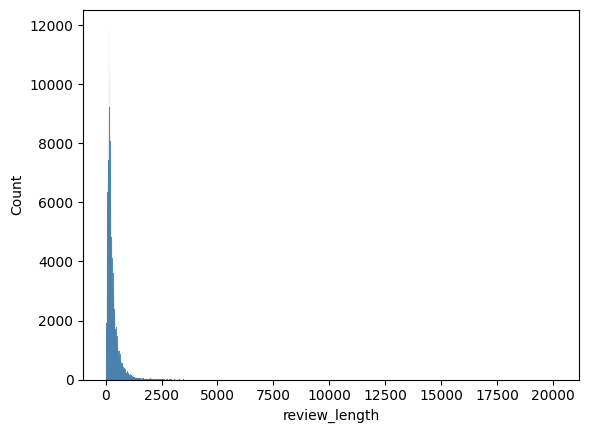

In [18]:
# –ü–æ—Å—Ç—Ä–æ–∏—Ç –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ review_length –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ df
# –û–Ω–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–∞
sns.histplot(df['review_length'])

<Axes: ylabel='review_length'>

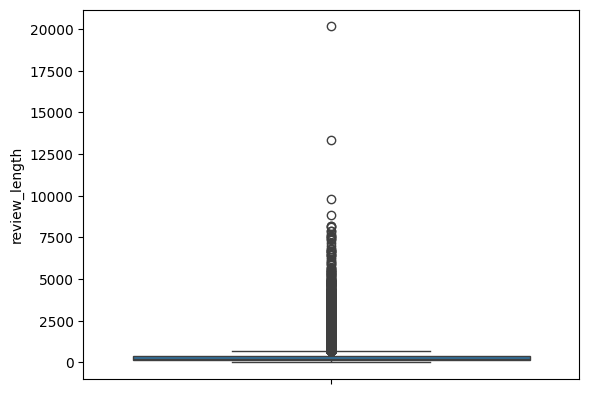

In [19]:
sns.boxplot(df['review_length'])

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ –¥–ª–∏–Ω–Ω—ã–µ –∏ –Ω–∞ —Å–∞–º—ã–µ –∫–æ—Ä–æ—Ç–∫–∏–µ –æ—Ç–∑—ã–≤—ã

In [20]:
df.query('review_length > 10000')['text'].values

array(['Que si, que no...\\n–ú–Ω–æ–≥–∞–∂–¥—ã –±—ã–≤–∞–ª –≤ —ç—Ç–æ–º –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–º –æ—Ç–µ–ª–µ, –∏ —Å –∫–∞–∂–¥—ã–º —Ä–∞–∑–æ–º –≤—Å—ë –±–æ–ª—å—à–µ –∏ –±–æ–ª—å—à–µ —ç—Ç–∞ –ø–µ—Å–Ω—è –ø—Ä–æ —Ç—É–ø—è—â–µ–≥–æ –≤–ª—é–±–ª—ë–Ω–Ω–æ–≥–æ, —è–≤–ª—è—é—â–∞—è—Å—è –≥–∏–º–Ω–æ–º –æ—Ç–µ–ª—è, –≤—Å—ë —Ç–æ—á–Ω–µ–µ –∏ —Ç–æ—á–Ω–µ–µ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –æ—Ç–¥—ã—Ö–∞. –í–æ–æ–±—â–µ, —ç—Ç–æ—Ç –≥–∏–º–Ω –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—è–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥—è—â–µ–µ —Å –í–∞–º–∏ –Ω–∞ –æ—Ç–¥—ã—Ö–µ –≤ –Ø–ª—Ç–∞ –ò–Ω—Ç—É—Ä–∏—Å—Ç.\\n–ù–∞—á–∏–Ω–∞–µ—Ç—Å—è –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ —Å–µ—Ä–≤–∏—Å–∞ —Å–æ —Å–ª—É–∂–±—ã —Ä–∞–∑–º–µ—â–µ–Ω–∏—è (—ç—Ç–æ —Ç–µ, –∫–æ–≥–æ –Ω–∞–∑—ã–≤–∞—é—Ç —Ä–µ—Å–µ–ø—à–Ω). –ü—Ä–∏–≤–µ—Ç–ª–∏–≤–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –Ω–∞ —Å—Ç–æ–π–∫–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –æ—Ç–¥–µ–ª—å–Ω–æ, –í–∞—Å –≤—Å–µ–≥–¥–∞ –≤—Å—Ç—Ä–µ—Ç—è—Ç —Å —É–ª—ã–±–∫–æ–π, –≤—Å—ë —Ä–∞—Å—Å–∫–∞–∂—É—Ç –∏ –æ—Ç–≤–µ—Ç—è—Ç –Ω–∞ –í–∞—à–∏ –≤–æ–ø—Ä–

In [21]:
df.query('review_length < 10')['text'].values

array(['–ö—Ä—É—Ç–æ', '–ö—Ä—É—Ç–æ', '–∫–∞–π—Ñ\\n', '–í—Å–µ –∫—Ä—É—Ç–æ', '–û—Ç–ª–∏—á–Ω–æ ', '–û—Ç–ª–∏—á–Ω–æ!',
       '–ü—Ä–∏–ª–∏—á–Ω–æ ', '–õ—É—á—à–∏–µ!', '–ö–ª–∞—Å!', '–ö–ª–∞—Å—Å', '–•–æ—Ä–æ—à–æ ', '–£–¥–æ–±–Ω–æ',
       '–°—É–ø–µ—Ä', '–ù–µ –ø–ª–æ—Ö–æ ', '–ù–æ—Ä–º–∞–ª—å–Ω–æ', '–°–ø–∞—Å–∏–±–æ!', '–û—Ç–ª–∏—á–Ω–æ',
       '–°–ø–∞—Å–∏–±–æ', '–ù–æ—Ä–º', '–°—Ç–∞–Ω–¥–∞—Ä—Ç.', '–ß–∏—Å—Ç–æ!', '–í—Å–µ –æ—Ç–ª', '–£–¥–æ–±–Ω–æ',
       '–•–æ—Ä–æ—à–æ', '10 –∏–∑ 10', '–û–∫', '–í–∫—É—Å–Ω–æ', '–°—É–ø–µ—Ä', '–ù–æ—Ä–º', '–í–∫—É—Å–Ω–æ',
       '–ö—Ä–∞—Å–∞–≤—Ü—ã', '–ù–µ –≤–∫—É—Å–Ω–æ', '–í—Å–µ –Ω–æ—Ä–º.', '–ü—Ä–æ—Ñ–∏!', '–û—Ç–ª–∏—á–Ω–æ.',
       '–ö—Ä—É—Ç—å', '–ß–∏—Å—Ç–æ', '–û—Ç–ª–∏—á–Ω–æ.', '–•–æ—Ä–æ—à–æ ', '–ë–æ–º–±–∞', '–í—Å—ë —Å—É–ø–µ—Ä',
       '—Ç–æ–ø —Ç–æ–ø', '–ù–æ—Ä–º', '–í–ø–æ–ª–Ω–µ!', '–í—Å—ë —á√´—Ç–∫–æ', '–í–∫—É—Å–Ω–æ', '–ö–ª–∞—Å—Å! '],
      dtype=object)

–ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, —á—Ç–æ —Å–ª–∏—à–∫–æ–º –∫–æ—Ä–æ—Ç–∫–∏–µ –∏ —Å–ª–∏—à–∫–æ–º –¥–ª–∏–Ω–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –±–µ—Å—Å–º—ã—Å–ª–µ–Ω—ã. –°—á–∏—Ç–∞–µ–º –∏—Ö –∑–∞ –≤—ã–±—Ä–æ—Å –∏ —É–¥–∞–ª—è–µ–º

In [22]:
df_cor = df[['rating', 'review_length']]
df_cor

rating  review_length
0            3            537
1            5            158
2            1            485
3            4            142
4            5            373
...        ...            ...
499025       5             76
499026       4            295
499027       4            325
499028       5            502
499029       5            250

[499030 rows x 2 columns]

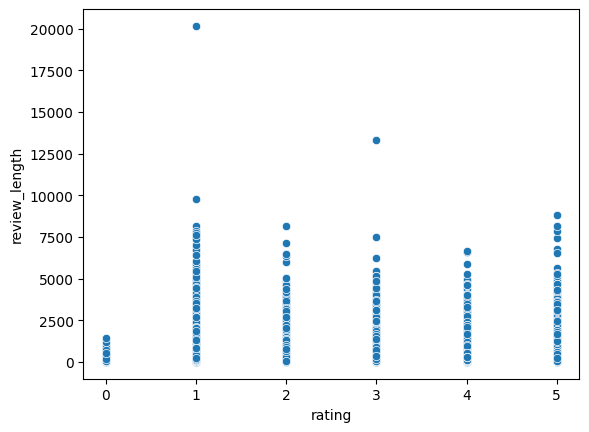

In [23]:
sns.scatterplot(x ='rating', y = 'review_length', data=df_cor)
plt.show()

–ü–æ—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É

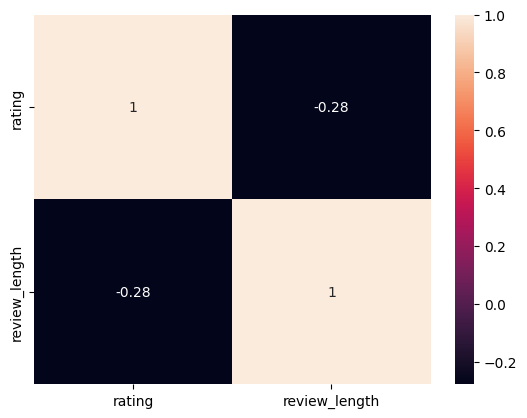

In [24]:
corr_matrix = df_cor.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

–ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ -0.28 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–ª–∞–±—É—é –æ–±—Ä–∞—Ç–Ω—É—é (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é) –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –¥–≤—É–º—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ 

In [25]:
# –°–æ—Ö—Ä–∞–Ω–∏–º –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –≤ tsv —Ñ–∞–π–ª –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã
df.to_csv('geo-reviews-dataset-2023.tsv', sep='\t', index=False)

# –†–∞—Å—á–µ—Ç —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏ —Å–ª–æ–≤

In [26]:
# –°–æ–±–µ—Ä–µ–º –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É
words_list_list = df['text'].to_list()
words_str = ' '.join(str(string) for string in words_list_list)

### –£–¥–∞–ª–∏–º –∏–∑ —Å—Ç—Ä–æ–∫–∏ –≤—Å–µ —Å–ø–µ—Ü.—Å–∏–º–≤–æ–ª—ã

In [27]:
def remove_chars_from_text(text, chars):
    return "".join([char for char in text if char not in chars])

spec_chars = string.punctuation + '\n\xa0¬´¬ª\t‚Äî‚Ä¶n'

text = remove_chars_from_text(words_str, spec_chars)
text = remove_chars_from_text(text, string.digits)

# –ü—Ä–∏–≤–µ–¥–µ–º –≤—Å–µ —Å–ª–æ–≤–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
text = text.lower()

In [28]:
# –¢–æ–∫–µ–Ω–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç
nltk.download('punkt_tab')
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

In [29]:
text = nltk.Text(text_tokens)
fdist = FreqDist(text)

In [30]:
print('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º\n')
print(f'–í—Å–µ–≥–æ —Å–ª–æ–≤: {fdist.N()}\n')
print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {fdist.B()}\n')
print('–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: ')
most_common_words = fdist.most_common(10)
for word in most_common_words:
    print(f'{word[0]}:  {word[1]}')

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

–í—Å–µ–≥–æ —Å–ª–æ–≤: 21306636

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: 742932

–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: 
–∏:  874480
–≤:  604858
–Ω–µ:  400240
–Ω–∞:  389339
–æ—á–µ–Ω—å:  298972
—Å:  289708
—á—Ç–æ:  205890
–≤—Å–µ:  170685
–Ω–æ:  141965
–ø–æ:  137147


In [31]:
# –¢–µ–ø–µ—Ä—å –æ—á–∏—Å—Ç–∏–º —Å–ª–æ–≤–∞ –æ—Ç —Å–ª—É–∂–µ–±–Ω—ã—Ö —á–∞—Å—Ç–µ–π —Ä–µ—á–∏
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
custom_stopwords = ['–æ—á–µ–Ω—å', '—ç—Ç–æ', '–≤—Å—ë', '–≤—Å–µ–º', '–µ—â–µ', '–µ—â—ë']
stopwords_united = russian_stopwords + custom_stopwords
text_with_no_stopwords = [word for word in text if word not in stopwords_united]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# –ò –ø–æ—Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

fdist = FreqDist(text_with_no_stopwords)

print('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º\n')
print(f'–í—Å–µ–≥–æ —Å–ª–æ–≤: {fdist.N()}\n')
print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {fdist.B()}\n')
print('–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: ')
most_common_words = fdist.most_common(10)
for word in most_common_words:
    print(f'{word[0]}:  {word[1]}')

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

–í—Å–µ–≥–æ —Å–ª–æ–≤: 14173971

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: 742776

–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: 
–ø–µ—Ä—Å–æ–Ω–∞–ª:  82456
–º–µ—Å—Ç–æ:  74975
—Å–ø–∞—Å–∏–±–æ:  73776
—Ä–µ–∫–æ–º–µ–Ω–¥—É—é:  60037
–ø—Ä–æ—Å—Ç–æ:  49583
–º–∞–≥–∞–∑–∏–Ω:  46361
—Ö–æ—Ä–æ—à–∏–π:  43166
—Ü–µ–Ω—ã:  42268
–≤–∫—É—Å–Ω–æ:  40279
–±—ã—Å—Ç—Ä–æ:  40030


<Axes: xlabel='Samples', ylabel='Counts'>

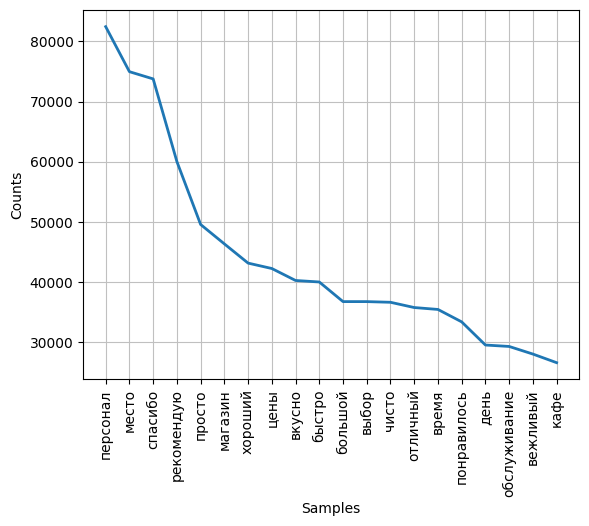

In [33]:
fdist.plot(20,cumulative=False)

## –°–æ—Å—Ç–∞–≤–∏–º –æ–±–ª–∞–∫–æ —Å–ª–æ–≤

In [34]:
wordcloud = WordCloud(width=1200, height=600).generate_from_frequencies(fdist)

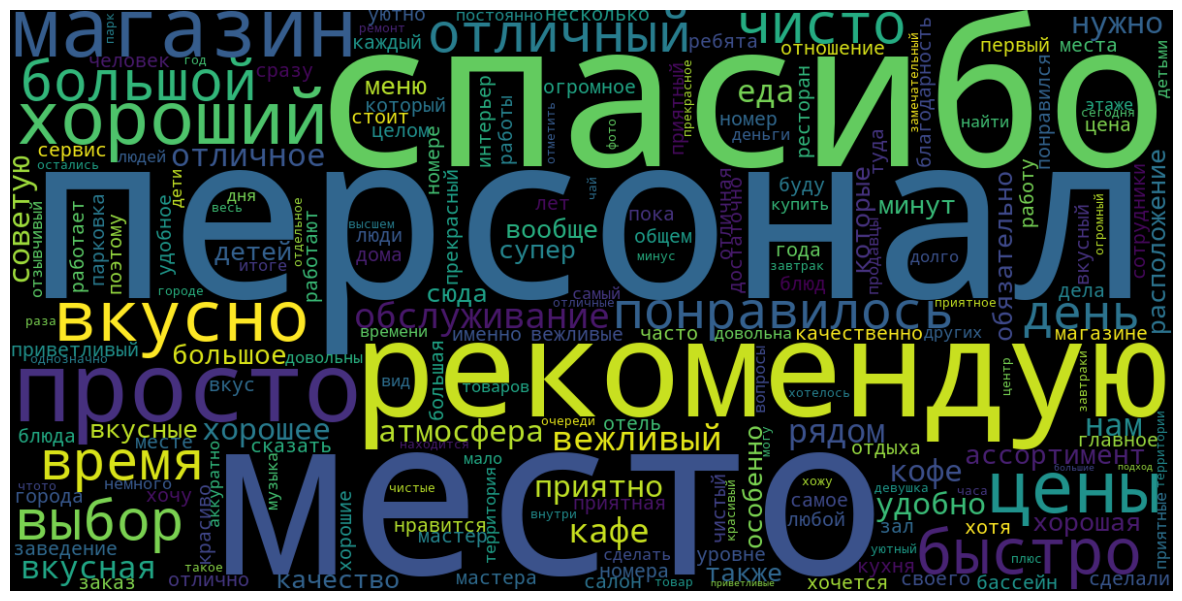

In [35]:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

–í –∏—Ç–æ–≥–µ, –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–æ–∫–∏ —Å–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –∏ –º–∞–ª–µ–Ω—å–∫–æ–π –¥–ª–∏–Ω–Ω–æ–π —Ç–µ–∫—Å—Ç–∞, –¥—É–±–ª–∏–∫–∞—Ç—ã, –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

## –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499030 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        499030 non-null  object
 1   name_ru        499030 non-null  object
 2   rating         499030 non-null  int64 
 3   rubrics        499030 non-null  object
 4   text           499030 non-null  object
 5   review_length  499030 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.8+ MB


## –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º —Ç–µ–∫—Å—Ç:

In [37]:
def normalize_text(text):
    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()
    
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
    text = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø0-9\s]', '', text)
    
    return text

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–º –æ—Ç–∑—ã–≤–∞–º
df['text'] = df['text'].apply(normalize_text)

In [38]:
df.nunique()

address          191639
name_ru          148456
rating                6
rubrics           31724
text             498805
review_length      3004
dtype: int64

In [39]:
# C–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ —á–µ–º –≤ 0.00021% —Å–ª—É—á–∞–µ–≤
category_counts = df['rubrics'].value_counts(normalize=True)
rare_categories = category_counts[category_counts < 0.0000021].index

rare_categories

Index(['–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ –±–∞–Ω—å –∏ —Å–∞—É–Ω;–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ –¥–∞—á–Ω—ã—Ö –¥–æ–º–æ–≤ –∏ –∫–æ—Ç—Ç–µ–¥–∂–µ–π;–ë—ã—Å—Ç—Ä–æ–≤–æ–∑–≤–æ–¥–∏–º—ã–µ –∑–¥–∞–Ω–∏—è',
       '–†–µ–º–æ–Ω—Ç —Ç–µ–ª–µ—Ñ–æ–Ω–æ–≤;–ú–∞–≥–∞–∑–∏–Ω —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∏;–†–µ–º–æ–Ω—Ç –±—ã—Ç–æ–≤–æ–π —Ç–µ—Ö–Ω–∏–∫–∏',
       '–ò–∑–≥–æ—Ç–æ–≤–ª–µ–Ω–∏–µ –≤—ã–≤–µ—Å–æ–∫;–ö–æ–ø–∏—Ä–æ–≤–∞–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä;–ù–∞—Ä—É–∂–Ω–∞—è —Ä–µ–∫–ª–∞–º–∞',
       '–î–µ–∫–æ—Ä–∞—Ç–∏–≤–Ω—ã–µ –ø–æ–∫—Ä—ã—Ç–∏—è;–°—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–µ –∏ –æ—Ç–¥–µ–ª–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã',
       '–ê–≤—Ç–æ—Å–µ—Ä–≤–∏—Å, –∞–≤—Ç–æ—Ç–µ—Ö—Ü–µ–Ω—Ç—Ä;–®–∏–Ω–æ–º–æ–Ω—Ç–∞–∂;–ü—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ –∞–≤—Ç–æ–∑–∞–ø—á–∞—Å—Ç–µ–π;–ú–∞–≥–∞–∑–∏–Ω –∞–≤—Ç–æ–∑–∞–ø—á–∞—Å—Ç–µ–π –∏ –∞–≤—Ç–æ—Ç–æ–≤–∞—Ä–æ–≤;–ö—É–∑–æ–≤–Ω–æ–π —Ä–µ–º–æ–Ω—Ç',
       '–≠–ª–µ–∫—Ç—Ä–æ- –∏ –±–µ–Ω–∑–æ–∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç;–î–µ—Ä–µ–≤–æ–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—â–µ–µ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ;–°—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç',
       '–ú–∞–≥–∞–∑–∏–Ω —Å—ã—Ä–æ–≤;–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç',
       

–£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0

In [40]:
# –£–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0
df = df.query("rating > 0")

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
df.nunique()

address          191595
name_ru          148421
rating                5
rubrics           31715
text             498606
review_length      3004
dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

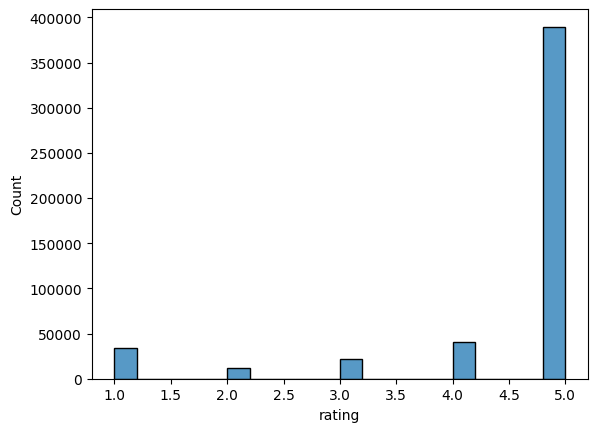

In [41]:
# –í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
sns.histplot(df['rating'])

In [42]:
# –ü—Ä–æ–≤–µ—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ —É–¥–∞–ª–∏–ª–æ—Å—å –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498830 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498830 non-null  object
 1   name_ru        498830 non-null  object
 2   rating         498830 non-null  int64 
 3   rubrics        498830 non-null  object
 4   text           498830 non-null  object
 5   review_length  498830 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


–î–∞–ª–µ–µ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –∏ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–æ–π –¥–ª–∏–Ω–Ω–æ–π —Ç–µ–∫—Å—Ç–∞

In [43]:
# –£–¥–∞–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ —Å –¥–ª–∏–Ω–æ–π –±–æ–ª–µ–µ 4000 —Å–ª–æ–≤
df = df.query('review_length < 4000')

# –£–¥–∞–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ —Å –¥–ª–∏–Ω–æ–π –º–µ–Ω–µ–µ 10 —Å–ª–æ–≤
df = df.query('review_length > 10')

In [44]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498639 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498639 non-null  object
 1   name_ru        498639 non-null  object
 2   rating         498639 non-null  int64 
 3   rubrics        498639 non-null  object
 4   text           498639 non-null  object
 5   review_length  498639 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


<Axes: xlabel='review_length', ylabel='Count'>

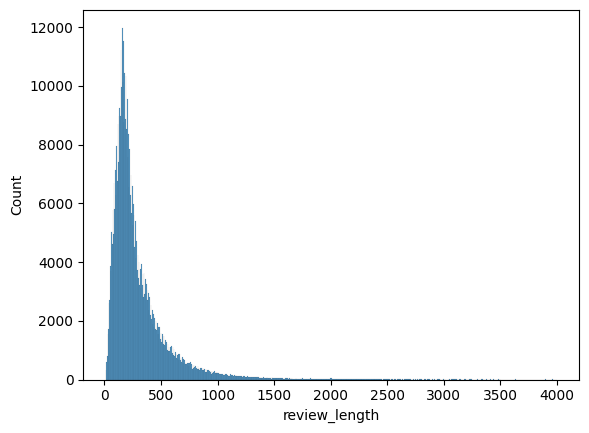

In [45]:
# –í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ –¥–ª–∏–Ω–µ –æ—Ç–∑—ã–≤–æ–≤, –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
sns.histplot(df['review_length'])

In [46]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤ –ø–æ —Ä–µ–π—Ç–∏–Ω–≥—É
print(Counter(df['rating']))

Counter({5: 389606, 4: 41096, 1: 34246, 3: 21634, 2: 12057})


In [47]:
# –ó–∞–º–µ–Ω—è–µ–º —Å–∏–º–≤–æ–ª—ã –ø–µ—Ä–µ–Ω–æ—Å–∞ —Å—Ç—Ä–æ–∫–∏ (\\n) –Ω–∞ –ø—Ä–æ–±–µ–ª—ã:
df['text'] = df['text'].str.replace('\\n', ' ')

In [48]:
# –û—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞–§—Ä–µ–π–º:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498639 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498639 non-null  object
 1   name_ru        498639 non-null  object
 2   rating         498639 non-null  int64 
 3   rubrics        498639 non-null  object
 4   text           498639 non-null  object
 5   review_length  498639 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ–¥–∞—á–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ

–°—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, –æ–±—ä–µ–¥–∏–Ω–∏–º rubrics, rating –∏ text –≤ –µ–¥–∏–Ω—ã–π —Ç–µ–∫—Å—Ç–æ–≤—ã–π —Ñ–æ—Ä–º–∞—Ç:

In [49]:
def format_review(row):
    return f"Category: {row['rubrics']}. Rating: {row['rating']}. Review: {row['text']}"

df['formatted_text'] = df.apply(format_review, axis=1)

In [50]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
def tokenize_function(texts):
    return tokenizer(texts, truncation=True, padding="max_length", max_length=512)

# –ü—Ä–∏–º–µ—Ä –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è
df['tokenized'] = df['formatted_text'].apply(tokenize_function)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Kirill\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Kirill\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "C:\Users\Kirill\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io

–° –ø–æ–º–æ—â—å—é datasets –∏–∑ Hugging Face —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è:

In [51]:
dataset = Dataset.from_pandas(df[['formatted_text']])

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤
def tokenize_data(batch):
    return tokenizer(batch['formatted_text'], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize_data, batched=True)

Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 498639/498639 [15:57<00:00, 520.81 examples/s] 


In [52]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
train_test_split = tokenized_dataset.train_test_split(test_size=0.1)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

In [53]:
# –°–æ–∑–¥–∞–Ω–∏–µ collator –¥–ª—è –∑–∞–¥–∞—á–∏ —è–∑—ã–∫–æ–≤–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # GPT-2 –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –º–∞—Å–∫–∏—Ä–æ–≤–∞–Ω–∏–µ
)

`DataCollatorForLanguageModeling` - –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Hugging Face, –∫–æ—Ç–æ—Ä—ã–π –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –±–∞—Ç—á–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∑–∞–¥–∞—á NLP. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∫ –æ–±—É—á–µ–Ω–∏—é GPT-2, –µ—Å–ª–∏ –ø–µ—Ä–µ—á–∏—Å–ª–∏—Ç—å —á—Ç–æ –æ–Ω –¥–µ–ª–∞–µ—Ç:

1. –§–æ—Ä–º–∏—Ä—É–µ—Ç –±–∞—Ç—á–∏
2. –î–æ–±–∞–≤–ª–µ–µ—Ç —Å–ø–µ—Ü–∏–∞–ª—å–Ω–µ —Ç–æ–∫–µ–Ω—ã
3. –£–ø—Ä–æ—â—è–µ—Ç –æ–±—Ä–∞–±–æ—Ç–∫—É

–í –∏—Ç–æ–≥–µ –Ω–∞ —ç—Ç–∞–ø–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º—ã –ø–æ–ª—É—á–∏–ª–∏:

1. `train_dataset` –∏ `test_dataset` - –¥–∞—Ç–∞—Å–µ—Ç—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–¥–∏–∞—Ü–∏–∏
2. `data_collator` - "–ø–æ–¥–±–æ—Ä—â–∏–∫ –¥–∞–Ω–Ω—ã—Ö", –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
3. `tokenizer` - –æ–±—É—á–µ–Ω–Ω—ã–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments
import torch

# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ GPT-2
model = GPT2LMHeadModel.from_pretrained("gpt2")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    output_dir="./model",  # –ü–∞–ø–∫–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
    overwrite_output_dir=True,
    num_train_epochs=3,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    per_device_train_batch_size=2,  # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
    per_device_eval_batch_size=2,  # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
    warmup_steps=500,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ —Ä–∞–∑–æ–≥—Ä–µ–≤–∞
    weight_decay=0.01,  # –°–∏–ª–∞ L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    logging_dir='./logs',  # –ü–∞–ø–∫–∞ –¥–ª—è –ª–æ–≥–æ–≤
    logging_steps=10,
    save_steps=500,
    save_total_limit=2,  # –•—Ä–∞–Ω–∏—Ç—å —Ç–æ–ª—å–∫–æ –¥–≤–µ –ø–æ—Å–ª–µ–¥–Ω–∏–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏
)


# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ Trainer –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –æ–±—É—á–µ–Ω–∏—è
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
)

In [65]:
# –ó–∞–ø—É—Å–∫ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è
trainer.train()

FailedPreconditionError: ./logs is not a directory

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
trainer.save_model()

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –æ—Ç–∑—ã–≤–æ–≤

In [ ]:
def generate_review(category, rating, keywords):
    input_text = f"Category: {category}. Rating: {rating}. Review:"
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
    with torch.no_grad():
        output = model.generate(input_ids, max_length=100, num_return_sequences=1)
            
    # –î–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –≤—ã–≤–æ–¥ —Ç–µ–∫—Å—Ç–∞
    review = tokenizer.decode(output[0], skip_special_tokens=True)
    return review

# –ü—Ä–∏–º–µ—Ä –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –æ—Ç–∑—ã–≤–∞
generated_review = generate_review("–ö–∞—Ñ–µ", 4, ["–≤–∫—É—Å–Ω—ã–π", "—É—é—Ç–Ω—ã–π"])
generated_review

# –ê–Ω–∞–ª–∏–∑

–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏, —Ç–∞–∫–∏–µ –∫–∞–∫:

*BLEU* –∏–ª–∏ *ROUGE* –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏.
–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å –ø–æ–º–æ—â—å—é —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–π –æ—Ü–µ–Ω–∫–∏.

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge

# –ü—Ä–∏–º–µ—Ä —Ä–µ–∞–ª—å–Ω–æ–≥–æ –æ—Ç–∑—ã–≤–∞ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
real_review = "–ö–∞—Ñ–µ –æ—á–µ–Ω—å –≤–∫—É—Å–Ω–æ–µ, —É –Ω–∏—Ö —É—é—Ç–Ω–∞—è –∞—Ç–º–æ—Å—Ñ–µ—Ä–∞ –∏ –ø—Ä–∏–≤–µ—Ç–ª–∏–≤—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª."

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –æ—Ç–∑—ã–≤–∞ —Å –ø–æ–º–æ—â—å—é –≤–∞—à–µ–π —Ñ—É–Ω–∫—Ü–∏–∏
generated_review = generate_review("–ö–∞—Ñ–µ", 4, ["–≤–∫—É—Å–Ω—ã–π", "—É—é—Ç–Ω—ã–π"])

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è BLEU-–º–µ—Ç—Ä–∏–∫–∏
def compute_bleu(reference, generated):
    reference_tokens = reference.split()
    generated_tokens = generated.split()
    score = sentence_bleu([reference_tokens], generated_tokens)
    return score

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è ROUGE-–º–µ—Ç—Ä–∏–∫
def compute_rouge(reference, generated):
    rouge = Rouge()
    scores = rouge.get_scores(generated, reference)
    return scores

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
bleu_score = compute_bleu(real_review, generated_review)
rouge_scores = compute_rouge(real_review, generated_review)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –æ—Ç–∑—ã–≤:", generated_review)
print("BLEU Score:", bleu_score)
print("ROUGE Scores:", rouge_scores)